In [1]:
import numpy as np 

In [2]:
import pandas as pdimport 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
train_df=pd.read_csv("train.csv")

NameError: name 'pd' is not defined

In [7]:
import pandas as pd

In [11]:
train_df=pd.read_csv("Software/kaggle/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Software/kaggle/train.csv'

In [10]:
pwd

'/Users/kansari'

In [12]:
train_df=pd.read_csv("Software/kaggle/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Software/kaggle/train.csv'

In [13]:
train_df=pd.read_csv("Softwares/kaggle/train.csv")

In [14]:
train_df=pd.read_csv("./Softwares/kaggle/train.csv")

In [15]:
print train_df

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(train_df)? (<ipython-input-15-5f8c2712bbf6>, line 1)

In [16]:
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [17]:
def missingdata(data):    
total = data.isnull().sum().sort_values(ascending = False)    
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)    
ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])    
ms= ms[ms["Percent"] > 0]    
f,ax =plt.subplots(figsize=(8,6))    
plt.xticks(rotation='90')    
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)    
plt.xlabel('Features', fontsize=15)    
plt.ylabel('Percent of missing values', fontsize=15)    
plt.title('Percent missing data by feature', fontsize=15)    
return ms

IndentationError: expected an indented block (<ipython-input-17-c679dd082422>, line 2)

In [18]:
def missingdata(data):    
  total = data.isnull().sum().sort_values(ascending = False)    
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)    
  ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])    
  ms= ms[ms["Percent"] > 0]    
  f,ax =plt.subplots(figsize=(8,6))    
  plt.xticks(rotation='90')    
  fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)    
  plt.xlabel('Features', fontsize=15)    
  plt.ylabel('Percent of missing values', fontsize=15)    
  plt.title('Percent missing data by feature', fontsize=15)    
  return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


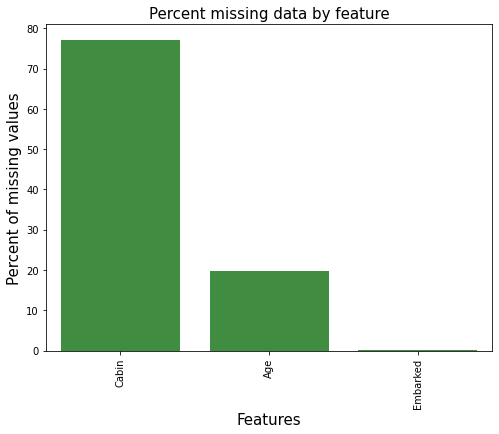

In [19]:
missingdata(train_df)

In [20]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [21]:
drop_column = ['Cabin']train_df.drop(drop_column, axis=1, inplace = True)

SyntaxError: invalid syntax (<ipython-input-21-0df9fe0ca0eb>, line 1)

In [22]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)

In [23]:
print('check the nan value in train data')print(train_df.isnull().sum())

SyntaxError: invalid syntax (<ipython-input-23-d801ad8d4624>, line 1)

In [24]:
print('check the nan value in train data')
print(train_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# test

In [30]:
all_data = train_df

for dataset in all_data :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], 
    bins=[0,14,20,40,120], 
    labels=['Children','Teenage','Adult','Elder'])

for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], 
    bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])
                                                                                
traindf=train_df
for dataset in traindf:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

TypeError: string indices must be integers

In [32]:
print(train_df[0]['FamilySize'])

KeyError: 0

In [33]:
for dataset in train_df :
    print(dataset['FamilySize'])

TypeError: string indices must be integers

In [34]:
for dataset in train_df :
    print(dataset)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


In [37]:
for dataset in train_df :
    print(dataset['SibSp'])

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


In [42]:
for dataset in train_df :
    print(train_df[dataset])

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, 

In [57]:

for dataset in train_df :
    i=i+1
    print(train_df.iloc[i]['Ticket'])

PC 17599
STON/O2. 3101282
113803
373450
330877
17463
349909
347742
237736
PP 9549
113783


In [56]:
all_data = train_df
i = 0
for dataset in all_data :
    ++i
    all_data.iloc[i]

In [60]:
all_data = train_df
i = 0
for dataset in all_data :
    ++i
    all_data.iloc[i]['FamilySize']=all_data.iloc[i]['SibSp'] + all_data.iloc[i]['Parch'] + 1

import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
y=0
for dataset in all_data:
    ++y
    all_data.iloc[y]['Title']=all_data.iloc[y]['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,14,20,40,120], labels=['Children','Teenage','Adult','Elder'])

for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])
                                                                                
traindf=train_df
for dataset in traindf:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

<ipython-input-60-f46267144274>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.iloc[i]['FamilySize']=all_data.iloc[i]['SibSp'] + all_data.iloc[i]['Parch'] + 1


AttributeError: 'str' object has no attribute 'apply'

<AxesSubplot:>

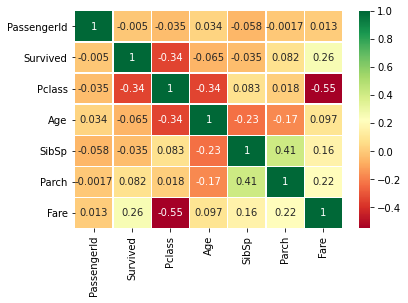

In [62]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()--